In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt

In [2]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)}) #Todas las visualizaciones con ese tamaño

In [3]:
df_SECOP = pd.read_csv('Datos_SECOP_LT.csv', 
                 sep = ',',
                 index_col=0,
                 dtype={
                     'Nit Entidad': str
                 })
df_SECOP.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Duración mes
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1090917,CDPS-018-2020_2,CO1.BDOS.1054442,CONTRATO DE PRESTACIÓN DE SERVICIOS.,Presentación de oferta,2020-01-21,34387200,Contratación directa,8,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,8.0
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,2020-04-29,29117793,Contratación directa,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,0.0
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,2020-02-03,29816133,Contratación directa,165,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,5.5
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,2020-10-15,6443255,Contratación directa,51,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,1.7
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,2021-01-29,2980278,Contratación régimen especial,1,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Decreto 092 de 2017,1.0


In [4]:
df_SECOP_mun = df_SECOP[df_SECOP['Ciudad Entidad']=="Leticia"]

**Ejercicio**: Realizar una visualización de barras apiladas normalizadas dónde se observe el monto del _precio base_ por el tipo de _orden de entidad_ desagregado por la _fase_ de la contratación

In [5]:
df_SECOP_mun["Fase"].value_counts()

Presentación de oferta           897
Fase de ofertas                   38
Presentación de observaciones     31
Name: Fase, dtype: int64

In [11]:
alt.Chart(df_SECOP_mun).mark_bar().encode(
    x=alt.X('mean(Precio Base):Q',
           stack='normalize'),
    y=alt.Y('OrdenEntidad:N'),
    color=alt.Color('Fase')
)
text=alt.Chart(df_SECOP_mun).mark_text(dx=-50, dy=0,  color='black',size = 8).encode(
    x=alt.X('mean(Precio Base):Q',
           stack='normalize'),
    y=alt.Y('OrdenEntidad:N'),
    detail='Fase:N',
    text=alt.Text('mean(Precio Base):Q',format='.1f')
)
chart = bars + text
chart.properties(
    width=600,
    height=150
)

alt.LayerChart(...)

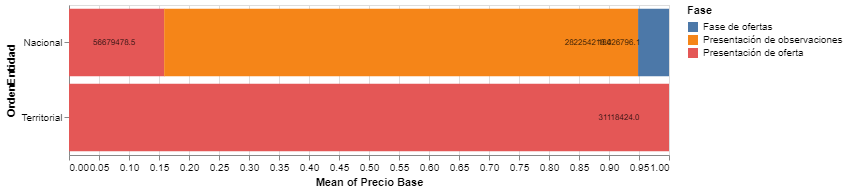

In [7]:
df_SECOP_mun.groupby(['Fase','OrdenEntidad'],as_index=False)['Precio Base'].mean()

,Fase,OrdenEntidad,Precio Base
0,Fase de ofertas,Nacional,1.842680e+07
1,Presentación de observaciones,Nacional,2.822542e+08
2,Presentación de oferta,Nacional,5.667948e+07
3,Presentación de oferta,Territorial,3.111842e+07


In [8]:
df_SECOP_mun.loc[df_SECOP_mun["OrdenEntidad"]=="Territorial","Fase"].value_counts()

Presentación de oferta    1
Name: Fase, dtype: int64

In [9]:
df_SECOP_mun.loc[df_SECOP_mun["OrdenEntidad"]=="Territorial"]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Duración mes
783743,AMAZONAS - CONTRALORIA DEPARTAMENTAL DEL AMAZONAS,838000110,Amazonas,Leticia,Territorial,CO1.REQ.1745592,SMC-001-2021,CO1.BDOS.1695754,CONTRATO DE PRESTACION DE SERVICIOS,Presentación de oferta,2021-01-25,31118424,Mínima cuantía,333,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,11.1


In [10]:
df_SECOP_mun.loc[df_SECOP_mun["OrdenEntidad"]=="Nacional","Fase"].value_counts()

Presentación de oferta           896
Fase de ofertas                   38
Presentación de observaciones     31
Name: Fase, dtype: int64